# Математические основы компьютерной графики

## Цель курса

Целью данного курса является дать вам представление об основных способах представления информации в компьютере и методах ее обработки.

Обычно обработка изображений не является самоцелью (если вы не фотограф, например), но служит для подготовки изображений к дальнейшей с ними работе. Например, вы можете обрабатывать изображение с камеры компьютера для того, чтобы алгоритмы глубокого обучения лучше выполняли свою работу, например, чтобы камера, являющаяся частью системы автономного управления автомобилем, лучше видела пешеходов на дороге, или чтобы система автоматической сортировки деталей на конвейере лучше их различала.

В курсе мы рассмотрим использование библиотеки компьютерного зрения OpenCV для задач обработки изображений. Она достаточно удобна, широко используется, в том числе и в коммерческих приложениях, и позволит нам использовать основные методы обработки изображений без особых временных затрат. Так же эта библиотека реализована для различных языков программирования и платформ. Мы будем использовать язык Python.

Задачей нашего курса будет разработка последовательности операций, необходимых для подготовки изображений к использованию для анализа с помощью методов машинного обучения.

Вы можете выбрать собственную тему для работы, однако в качестве примера мы будем использовать подготовку изображений египетских иероглифов к их дальнейшему автоматическому распознаванию (например, для статистической обработки - определния того, какие иероглифы встречаются на изображении чаще всего).

Сравните, например, следующие изображения:

![Фото стены](https://shkolazhizni.ru/img/content/i181/181894_big.jpg "Иероглифы1")

![Изображения иероглифов](https://image.freepik.com/free-vector/_87689-1103.jpg "Иероглифы2")

![Фото стеллы](https://cs9.pikabu.ru/post_img/2017/09/27/10/1506534513157029708.jpg "Иероглифы3")

![Набор иероглифов](https://shkolazhizni.ru/img/content/i181/181889_or.jpg "Иероглифы4")

![Фото стены](https://shkolazhizni.ru/img/content/i181/181888_big.jpg "Иероглифы5")

Какие из изображений более пригодны для автоматического анализа? Очевидно, что второе и четвертое изображения более пригодня для автоматической обработки. Фактически, это не фотографии - это сгенерированные изображения, на которых нет неравномерной яркости, нет деталей внутри изображений иероглифов (в то время как на фотографиях видны детали обработки камня, которые вовсе не важны для задач распознавания).

Наша цель - разработать последовательность операций над изображением, таких, чтобы иероглифы на изображении могли быть легко выделены автоматически.

## Язык Python и необходимые библиотеки

Для работы мы будем использовать широко распространенный язык [Python](https://www.python.org), его библиотеку [NumPy](https://numpy.org/) и библиотеку компьютерного зрения [OpenCV](https://opencv.org/). Библиотека NumPy предназначена для выполнения числовых расчетов среде языка Python, и ориентирована в основном на выполнение операций с матрицами, однако включает в себя так же функции для проведения численных и символьных расчетов, в том числе численного интегрирования, дифференцирования, и других. Для визуализации результатов мы будем использовать пакеты [matplotlib](https://matplotlib.org/ ) и [seaborn](https://seaborn.pydata.org/)

Кроме того, для работы мы будем использовать интерактивную web-среду разработки [Google Colab](https://colab.research.google.com), позволяющую оформлять текст, производить расчеты и строить графики в виде единого интерактивного документа, включающего все вышеперечисленное.


## Основы работы с OpenCV и Jupyter Notebook

OpenCV представляет собой библиотеку машинного зрения с открытым исходным кодом, развиваемую сообществом и используемую в том числе и коммерческими фирмами, что говорит о ее зрелости и пригодности для решения самых разных задач.

В библиотеке OpenCV содержится большое количество функций, которые мы будем использовать в работе.

### Открытие файлов, просмотр и сохранение изображений

Прежде, чем обрабатывать изображения, необходимо научиться считывать изображения с диска, показывать их на экране компьютера, и сохранять изображения на диск.

Рассмотрим пример работы.

Для начала импортируем нужные нам библиотеки:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Если ошибок нет, то никаких сообщений не появится.

Что мы только что сделали? Импортировали библиотеку (или, как говорят профессиональные программисты, модуль) под
названием *NumPy* (это математическая библиотека, математика нам понадобится),
подключили часть библиотеки *matplotlib* под названием *pyplot*, и указали, что в дальнейшем в нашей программе она будет называться *plt*,
импортировали модуль *cv2*, это библиотека компьютерного зрения *OpenCV*, в которой есть многие нужные нам функции.

Последняя команда позволяет просматривать картинки прямо в среде *Google Colab*.


Рассмотрим импорт изображений:

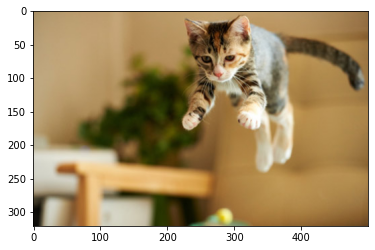

In [ ]:
image = cv2.imread('index.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.imshow(image)
plt.show()

Здесь вы видите 5 команд. Первая, `image = cv2.imread('index.png')` читает картинку из файла `index.png`, и помещает ее в переменную `image`.

Вторая, `image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`, берет содержимое переменной `image`, и конвертирует цвета из цветовой схемы `BGR`, в цветовую схему `RGB`, помещая результат снова в переменную `image`.

Команда `fig = plt.figure()` создает полотно изображения, область, в которой будет выведена картинка.

Команда, `plt.imshow(image)`, выводит содержимое переменной `image` в подготовленную область.

И, наконец, `plt.show()` выводит изображение в блокноте на экран.


Для того, чтобы просматривать изображение на экране, нам приходится преобразовывать его цвета. Давайте создадим специальную функцию, которая будет показывать изображение на экране.

Создадим функцию для вывода изображения на экран:

In [ ]:
def show_image(image):
    image_to_show = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig = plt.figure()
    plt.imshow(image_to_show)
    plt.show()

### Работа с изображением из сети интернет

Займемся обработкой изображения из сети интернет:

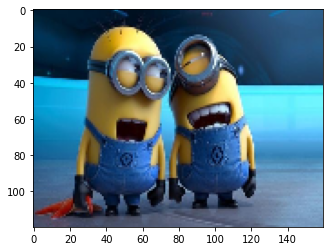

In [ ]:
import urllib

url = 'https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fwww.cleverfiles.com%2Fhowto%2Fwp-content%2Fuploads%2F2018%2F03%2Fminion.jpg&sp=ecbd567c848e2d7eb092cfa9921acb37&anticache=847987'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = cv2.resize(image,(160, 120))
show_image(image)

Первой строкой мы импортируем модуль для работы с сетевыми сервисами (скачиванием из локальной сети и из сети интернет), затем задаем в переменной `url` адрес изображения в сети, которе хотим скачать, получем набор байт, который соответствует изображению, затем конвертируем его в изображение, понятное библиотеке OpenCV командой `image = cv2.imdecode(image, cv2.IMREAD_COLOR)`, затем изменяем размер изображения (новый размер 160х120 пикселей) командой `image = cv2.resize(image,(160, 120))`.

Последней командой мы вызываем нашу функцию, которая показывает изображение на экране.

## Представление и параметры растровых изображений

Для представления графической информации в компьютере обычно используются два основных подхода: растровый и векторный. Векторный в нашем курсе не рассматривается, однако базовое представление о ней вы можете получить в [соответствующей статье википедии](https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0).

В нашем курсе мы сосредоточимся на растровой графике. Базовые представления о сути растровой графики можно получить из [соответствующей статьи википедии](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0).

Важнейшим понятием, используемым при работе с растровыми изображениями является [пиксел](https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D0%BA%D1%81%D0%B5%D0%BB%D1%8C).

Важной характеристикой растрового изображения, тесно связанной с понятием *пиксел*, является *разрешение*.

### Разрешение

Поскольку растровое изображение фактически представляет собой прямоугольную матрицу чисел (три матрицы для цветных изображений), разрешением изображения называется размер этой матрицы. Чем больше разрешение, тем выше качество изображения, но и тем больший объем памяти занимает изображение в памяти компьютера или на диске.

Операции масштабирования изображений широко используются при работе с фоографиями (и другими типами изображений). Следует помнить, что увеличение изображения обычно мало востребовано, так как (в отличие от того, как это изображается в фильмах), увеличение разрешения изображения не приводит к появлению на нем новых деталей. То есть, если у вас есть фотография группы людей с невысоким разрешением, и вы увеличиваете разрешение в надежде различить лицо человека, у вас ничего не получится - лицо будет размытым и новые детали не появятся. Так происходит потому, что в исходном изображении, например, нос занимал 3 пикселя, псоле операции увеличения разрешения в два раза он будет занимать 6 пикселей, но информации о цвете новых 3 пикселей, которые были добавлены при увеличении разрешения, в исходном изображении не было. Таким образом, алгоритм увеличения изображения должен был "придумать" эту информацию.


#### Масштабирование изображений

За масштабирование изображений в библиотеке *OpenCV* отвечает функция *resize*.

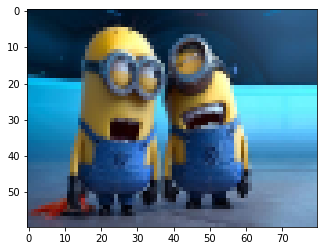

In [ ]:
image = cv2.resize(image,(80, 60))
show_image(image)

Здесь мы выполнили масштабирование изображения, хранящегося в переменной image, задав ему новое разрешение 80x60, поместили новое изображение в ту же переменную *image*, и вывели изображение на экран, используя функцию *show_image*, которую мы добавили ранее.

У функции *resize* есть так же дополнительный параметр, указывающий, какой алгоритм масштабирования будет использован.

Давайте попробуем масштабировать новое, уменьшенное изображение, до исходного размера, используя различные алгоритмы масштабирования.

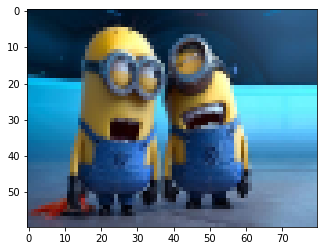

In [ ]:
scaled_up_image = cv2.resize(image,(640, 480), cv2.INTER_NEAREST)
show_image(image)

Примеры использования функции *resize* описаны в [статье на наглийском языке](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/).

##### Задание для работы

В ячейке ниже

1. Откройте файл изображения *egypt_luxor_karnak_hieroglyphics_wall_font_characters-1160772.jpg!d.jpeg*.
1. Выполните увеличение уменьшенного изображения иероглифов с использованием различных методов интерполяции до размера 1800x2252.
2. Опишите эти методы и опишите область их применимости.
3. Опишите, какие из методов могут быть использованы для уменьшения изображений.
4. Опишите, какие из методов могут быть рекомендованы для увеличения фотографий иероглифов с целью их последующего анализа.
5. Сохраните увеличенное изображение

### Аффинные преобразования

Очевидно, что идельное расположение камеры для съемки интересующего нас объекта - это перпедикулярно поверхности фотографируемого объекта. Таким образом мы получаем наименьшие геометрические искажения (конечно, при условии, что объект, который мы фотографируем - плоский).

Однако в реальности такие условия съемки доступны не всегда. Что же делать, если мы проводили съемку не под прямым углом к поверхности, и получили искажения?

Нам помогут геомерические преобразования изображения, в частности, аффинное преобразование.

Подробнее с теорией аффинных преобразований можно познакомиться в [википедии](https://ru.wikipedia.org/wiki/%D0%90%D1%84%D1%84%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5) и [викиучебнике](https://ru.wikibooks.org/wiki/%D0%90%D1%84%D1%84%D0%B8%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F). 

С практической точки зрения аффинные преобразования в OpenCV выполняются следующим образом:

1. Построить треугольник в координатах исходного изображения. Обычно в качестве вершин треугольника выбираются какие-то характерные точки изображения, например, если в изображении присутствует какая-то рамка, логично в качестве двух из трех вершин треугольника выбрать два угла рамки, а в качестве третьей вершины - середину противолежащей стороны.
2. Построить треугольник в координатах конечного изображения, с точками, заданными в той же последовательности. При этом, если в качестве вершин треугольника мы выбрали углы рамки, присутствующей на исходном изображении, то в конечном изображении они станут углами изображения, а третья точка - серединой противолежащей стороны.
3. Построить аматрицу аффинного преобразования.
4. Применить полученную матрицу к исходному изображению.

Откроем изображение, выведем его на экран и оценим его размеры

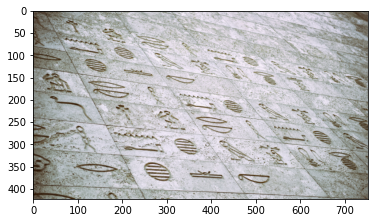

(423, 753, 3)

In [ ]:
image = cv2.imread('181888_big.jpg')
show_image(image)
image.shape

Выполнив эту ячейку, мы увидим, что размер изображения 753x423 (массивы в OpenCV и NumPy описываются построчно, так что первой координатой будет *y*, а затем *x*), и оно содержит 3 цвета.

В следующей ячейке задаим координаты вершин треугольников (в исходном изображении и в преобразованном изображении соответственно):


In [ ]:
src_tri = np.array( [[75, 75], [200, 320], [650, 200]] ).astype(np.float32)
dst_tri = np.array( [[0, 0], [0, 423], [753, 211]] ).astype(np.float32)

Точки на изображении можно видеть вот здесь:

![Source triagle](https://github.com/alsprogrammer/mathematical_basics_of_computer_graphics/blob/master/181888_big_points.jpg?raw=1)

Далее найдем матрицу преобразования, выполним преобразование и покажем результирующее изображение:

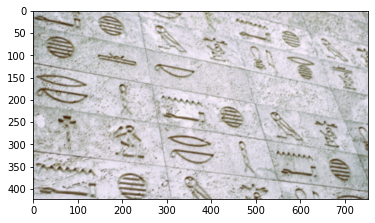

In [ ]:
warp_mat = cv2.getAffineTransform(src_tri, dst_tri)
dst_image = cv2.warpAffine(image, warp_mat, (753, 423))
show_image(dst_image)

### Перспективные преобразования

При обработке снимков иногда необходимо исправлять перспективные искажения, например, преобразовать непараллельные изображения исходного изображения в параллельные. Для этого используются перспективные преобразования.

Перспективные преобразования в OpenCV выполняются следующим образом:

1. Построить прямоугольник в координатах исходного изображения, выбирая какие ключевые точки изображения в качестве вершин прямоугольника.Прямоугольник, вероятнее всего, будет неправильным.
2. Построить тпрямоугольник в координатах конечного изображения, с точками, заданными в той же последовательности. Если вы выбрали в качестве ключевых точек вершины какого-либо прямоугольника на исходном изображении, в конечном изображении они станут координатами углов изображения.
3. Построить матрицу перспективного преобразования.
4. Применить полученную матрицу к исходному изображению.

Вновь рассмотрим изображение, которе мы использовали ранее

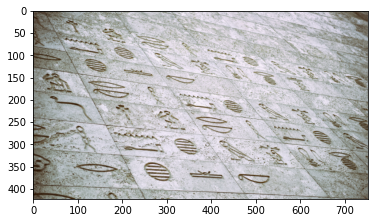

In [ ]:
image = cv2.imread('181888_big.jpg')
show_image(image)

В следующей ячейке задаим координаты вершин прямоугольников (в исходном изображении и в преобразованном изображении соответственно):



In [ ]:
pts1 = np.float32([[76,94],[239,402],[440,157],[664,419]])
pts2 = np.float32([[0,0],[0,422],[752,0],[752,422]])

Далее нам необходимо, как и в предыдущем случае, построить матрицу преобразований и применить ее к изображению:

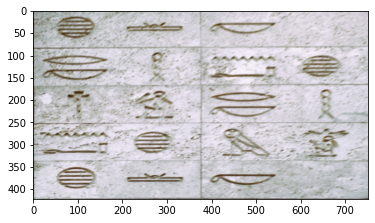

In [ ]:
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(image,M,(752,422))
show_image(dst)

##### Задание для работы

В ячейке ниже

1. Откройте файл изображения *egypt_luxor_karnak_hieroglyphics_wall_font_characters-1160772.jpg!d.jpeg*.
2. Используя функции преспективных преобразований, добейтесь того, чтобы изображение плиты с иероглифами занимало всю площадь изображения, а границы плиты были параллельны границам изображения.

### Цветовые модели

Одно и тоже растровое изображение может быть представлено в цифровом виде разными способами, отличающимися кодированием цвета.

Исторически одной из первых моделей была модель *RGB* (Red, Green, Blue). В данной модели предполагается, что цвет каждого пикселя изображения получается смешением трех базовых цветов, красного, зеленого и синего. Эта модель имеет биологические корни, она вдохновлена тем фактом, что человеческий глаз имеет 3 типа рецепторов (светочувствительных элементов), восприимчивых соответственно к красному, зеленому и синему свету, а поскольку человеческий глаз различает все цвета, было сделано предположение, что любой цвет может быть представлен как сумма этих цветов. Подробнее об этой модели можно почитать, например, в [википедии](https://ru.wikipedia.org/wiki/RGB). 

Кроме того, в типографии получила распространение модель *CMY(K)* (Cyan, Magenta, Yellow, blacK). Она тесно связана с моделью *RGB*. Дело в том, что экран компьютера и лист бумаги имеют принципиально разные способы формирования изображения: пиксели экрана **светятся самостоятельно**, в то время как точки на листе бумаги **отражают свет**. При этом цвета *RGB* и *CMY* являются взаимно-дополнительными, то есть для получения цвета *Cyan* из белого цвета необходимо вычесть красный (*Red*), для получения *Magenta* - зеленый (*Green*), а для получения желтого (*Yellow*) - синий (*Blue*). И наоборот, красный получается путем вычитания из белого цвета *Cyan*, и так далее. В википедии так же имеется соответствующая [статья](https://ru.wikipedia.org/wiki/CMYK) на эту тему.

Для целей обработки изображения также применяется модель *HSB* (или *HSV*) - Hue, Saturations, Brightness/Value (оттенок, насыщенность, яркость/значение). На эту тему так же имеется соответствующая [статья](https://ru.wikipedia.org/wiki/HSV_(%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C)). Модель *HSV* часто применяется именно в компьютерной обработке изображений, так как позволяет отделять объекты какого-либо заданного цвета от всех остальных объектов. В модели *HSV* цвет соответствует длине волны соотвествующего [светового излучения](https://ru.wikipedia.org/wiki/%D0%92%D0%B8%D0%B4%D0%B8%D0%BC%D0%BE%D0%B5_%D0%B8%D0%B7%D0%BB%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5). О моделях представления цвета и их сравнении существуют различные статьи, например, [вот эта](https://compuart.ru/article/23772).

При обработке изображений часто возникает необходимость преобразования изображения из одного формата представления цвета в другой, например, для специфической обработки изображения, как, например, выделения объектов. Пример можно увидеть в [соответствующей статье на Хабре](https://habr.com/ru/post/332464/).

Кроме того, иногда возникает необходимость преобразовать цветное изображение в [оттенки серого](https://ru.wikipedia.org/wiki/%D0%9E%D1%82%D1%82%D0%B5%D0%BD%D0%BA%D0%B8_%D1%81%D0%B5%D1%80%D0%BE%D0%B3%D0%BE) (например, если нас интересуют контуры объектов, а не их цвет, как в случае с иероглифами).

Для всех перечисленных действий в OpenCV имеются соответствующие функции:

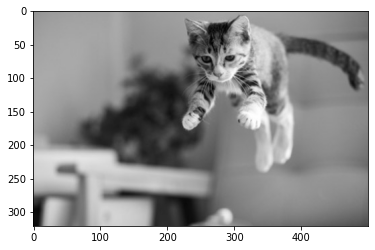

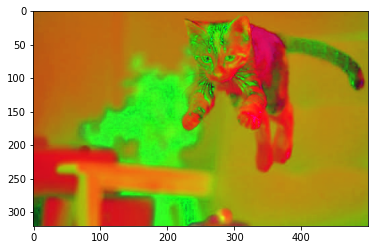

In [ ]:
image = cv2.imread('index.png') 

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show_image(gray_image)

hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
show_image(hsv_image)

Здесь первое изображение выведено в формате оттенков серого, а второе представляет собой интересный случай: это изображение преобразованов формат HSV и выведено на экран фукцией, которую мы ранее добавили в наш блокнот, `show_image`. Однако функция `show_image` предполагает, что ей на вход подается изображение в формате *BGR*, и воспринимает каналы Hue, Saturation и Value как цвета Red, Green и Blue.

В результате применения команды `hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)` переменная `hsv_image` соджержит массив размера `[длин, ширина, 3]`, то есть состоит из трех массивов, каждый из которых соответствует изображению, и содержит один из каналов, соответствуенно *hue* (оттенок), *saturation* (насыщенность) и *value* (значение).

Выведем Hue, Saturation и Value по отдельности:

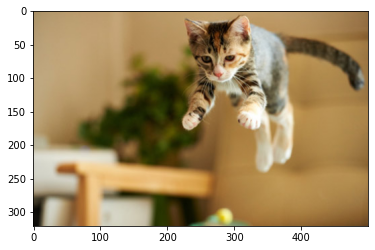

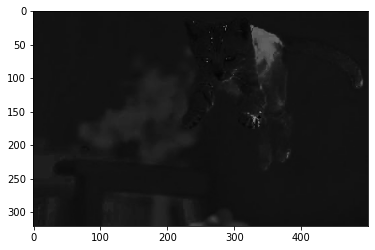

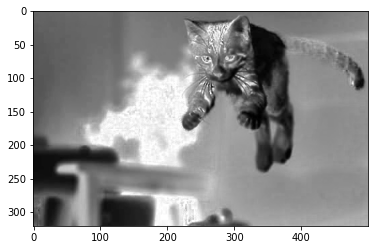

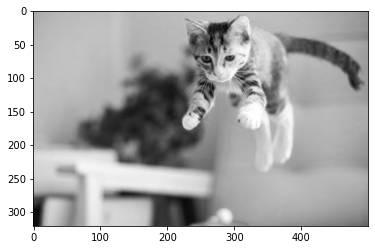

In [ ]:
show_image(image)

hue = hsv_image[:, :, 0]
show_image(hue)

saturation = hsv_image[:, :, 1]
show_image(saturation)

value = hsv_image[:, :, 2]
show_image(value)

##### Задание для работы

В ячейке ниже

1. Используйте изображение, полученное в предыдущем задании для самтостоятельной работы.
2. Используя функции преобразования цветовых пространств, добейтесь того, чтобы изображение иероглифов было максимально контрастным (для последующего анализа).

### Черно-белое изображение (бинаризация)

Для целей анализа (например, для извлечения изображений иерглифов с фотографии) во многих случаях больше подходит черно-белое изображение, а не изображение в оттенках серого.

Разница заключается в том, что в изображении в оттенках серого яркость каждого пикселя описывается многоразрядным двоичным числом (чаще всего одним байтом, поскольку подавляющее большинство людей не способны различить более 256 оттенков серого), а черно-белом изображении цвет каждого пикселя задается одним *битом*, то есть может принимать всего два занчения, 0 или 1.

Снова повторим, что при анализе изображений (например, при выделении изображений иероглифов с фотографии) во многих случаях важнее понять, является ли данный пиксель частью иероглифа (или другого объекта, который мы хотим выделить с сизображения), или нет. В этом случае, черно-белое изображение является идельным для данной цели: мы можем принять, что черный пиксель - это элемент  иероглифа, а белый пиксель - элемент фона (или наоборот, это непринципиально).

Существует несколько методик преобразования изображения в оттенках серого в черно-белое изображение, подавляющая часть из этих методик называется thresholding, то есть пороговое преобразование.

Суть метода заключается в следующем:

1. Каким-либо образом устанавливается значение порога, называемое threshold, например, 128.
2. Последовательно рассматриваются все пиксели изображения.
3. Для каждого пикселя исходного изображения выполняется проверка: если значение яркости пискселя исходного изображения выше порога, то соответствующему пикселю черно-белого изображения присваивается значение единица, в противном случае - ноль.

Следует отметить, что в OpenCV пиксели даже черно-белых изображений хранятся не в виде битовых нулей и единиц, а в виде байтов, где нуль соответствует черному цвету, а заданное значение, обычно 255 (так как именно 255 соответствует белому цвету в изображениях в оттенках серого) соответствует белому цвету.

Рассмотрим пример.

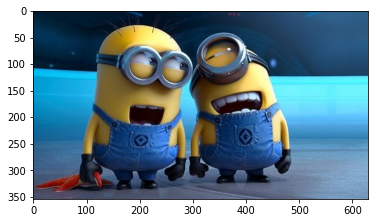

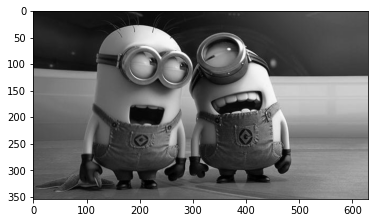

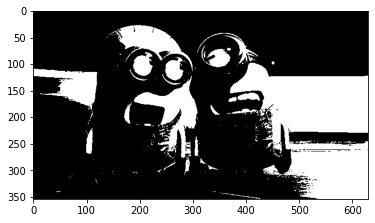

In [ ]:
import urllib

url = 'https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fwww.cleverfiles.com%2Fhowto%2Fwp-content%2Fuploads%2F2018%2F03%2Fminion.jpg&sp=ecbd567c848e2d7eb092cfa9921acb37&anticache=847987'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
show_image(image)

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show_image(gray_image)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
show_image(thresh_binary)

Команды получения изображения из сети и преобразования егов оттенки серого вам уже знакомы, мы не будем на них останавливаться, а вот команду преобразования изображения в черно-белое 
```
ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
```
рассмотрим подробнее.

Во-первых, функция `cv2.threshold` возвращает два занчения, `ret` и `thresh_binary`. Первое - это значение порога, которое было использовано для преобразования, второе - это собственно черно-белое изображение.

Функция принимает 4 параметра, первый - это исходное изображение в оттенках серого, второй - заданное значение порога, третий - максимальное значение яркости (значение, соответствующее белому цвету), и последний - это метод преобразования.

Кстати, в качестве исходного изображения можно передать не только изображение в оттенках серого, но и цветное изображение. В этом случае каждый из цветовых каналов расматривается как изображение в оттенках серого (которым он и является на самом деле), и в итоге, бинаризация будет применена к каждому из каналов независимо, например

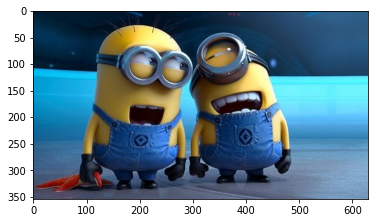

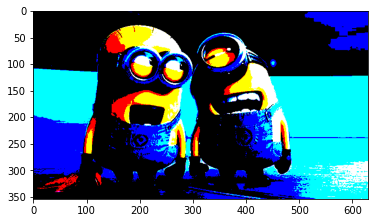

In [ ]:
url = 'https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fwww.cleverfiles.com%2Fhowto%2Fwp-content%2Fuploads%2F2018%2F03%2Fminion.jpg&sp=ecbd567c848e2d7eb092cfa9921acb37&anticache=847987'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
show_image(image)

ret,thresh_binary = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
show_image(thresh_binary)

Помимо метода `cv2.THRESH_BINARY`, который работает именно так, как описано выше, имеются еще 
```
cv.THRESH_BINARY
cv.THRESH_BINARY_INV
cv.THRESH_TRUNC
cv.THRESH_TOZERO
cv.THRESH_TOZERO_INV
cv.THRESH_MASK
cv.THRESH_OTSU
cv.THRESH_TRIANGLE
```

Их подробное описание (включая формулы) досупно [по ссылке(англ.)](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59).

Дополнительная информация о преобразовании в черно-белое изображение доступна [по ссылке (англ.)](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)

### Задание для самостоятельной работы

Используя вышеприведенное описание, преобразовать ранее обработанное изображение иероглифов в черно-белое изображение, используя различные методы преобразования (`cv.THRESH_BINARY`, `cv.THRESH_BINARY_INV`, `cv.THRESH_TRUNC`, `cv.THRESH_TOZERO`, `cv.THRESH_TOZERO_INV`, `cv.THRESH_MASK`, `cv.THRESH_OTSU`, `cv.THRESH_TRIANGLE`)

Выбрать наиболее адекватный метод.

####  Адаптивная бинаризация

Существует модификация метода, рассмотренного выше, называемая адаптивной бинаризацией.

Суть метода заключается в том, что занчение порога не устанавливается перед началом преобразования, и не сохраняется неизменным на протяжении всей процедуры бинаризации, а подбирается индивидуально для *каждого* пикселя.

Рассмотрим пример.

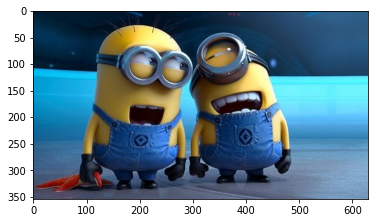

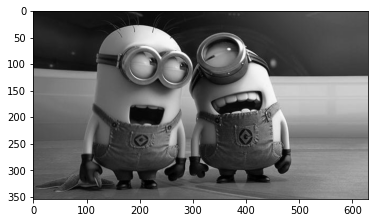

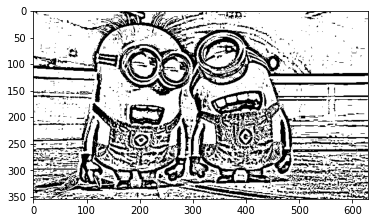

In [ ]:
url = 'https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fwww.cleverfiles.com%2Fhowto%2Fwp-content%2Fuploads%2F2018%2F03%2Fminion.jpg&sp=ecbd567c848e2d7eb092cfa9921acb37&anticache=847987'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
show_image(image)

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show_image(gray_image)

thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
show_image(thresh_mean)

Функция 
```
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
```
осуществляет адаптивную бинаризацию.

Результатом работы является бинаризованное изображение, входными параметрами являются исходное изображение для бинаризации, значение яркости, соответствующее белому цвету, как и в предыдущих функциях; метод вычисления порога `cv2.ADAPTIVE_THRESH_MEAN_C`, метод бинаризации (в данном случае `cv2.THRESH_BINARY`), размер стороны квадратного блока изображения в пикселях, который используется для вычисления порога для данного пикселя, и константа *C*. Пдробности, и описание различных методов вычисления порога для каждого пикселя досупны [по ссылке (англ.)](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)

### Задание для самостоятельной работы

В ячейке ниже использовать адаптивную бинаризацию для преобразования ранее полученного изображения иероглифов.

Сравнить результат с результатми предыдущего задания.

Выбрать более адекватный метод.